# Problem1 Regression

## 1. Import 

In [1]:
import pandas as pd
import numpy as np

from sklearn import neighbors, linear_model
from sklearn import model_selection

## 2. Load Data

In [2]:
day_data=pd.read_csv("day.csv")
hour_data=pd.read_csv("hour.csv")

day_columns="instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt"
hour_columns="instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt"

day_data.columns=day_columns.split(",")
hour_data.columns=hour_columns.split(",")

In [3]:
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [4]:
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## 3. Data pre-processing

In [5]:
def preprocessData(rider,data):
    data_X=data.values[:,2:-3]
    
    if rider =='casual':
        data_Y=data.values[:,-3]
    elif rider == 'registered':
        data_Y=data.values[:,-2]
    else :
        data_Y=data.values[:,-1]
    return data_X,data_Y

## 4. Process Data
### initialize

In [6]:
linear_Regression = linear_model.LinearRegression()
knearest_Regression = neighbors.KNeighborsRegressor(n_neighbors=5, weights='uniform')

### Train and Evaluate

In [7]:
def train_and_evaluate(data_X,data_Y,regression_type):
    kf = model_selection.KFold(n_splits=5, shuffle=True)
    total_MSE=0
    total_variance_score=0
    for train_index, test_index in kf.split(data_X):
        X_train, X_test = data_X[train_index], data_X[test_index]
        y_train, y_test = data_Y[train_index], data_Y[test_index]
        regression_type.fit(X_train, y_train)
        total_MSE+=np.mean((regression_type.predict(X_test) - y_test) ** 2)
        total_variance_score+=regression_type.score(X_test, y_test)
    print("Mean Squared Error: %.2f" % (total_MSE/5))
    print("variance score: %.2f" % (total_variance_score/5))
    
    

### Process

In [8]:
def process(rider,data,regression_type):
    data_X,data_Y=preprocessData(rider,data)
    train_and_evaluate(data_X,data_Y,regression_type)
    print("---------------")

### Print

In [9]:
def printResult(data,regression_type):
    print(regression_type)
    print("casual")
    process("casual",data,regression_type)
    print("registered")
    process("registered",data,regression_type)
    print("total")
    process("total",data,regression_type)
    print()

print("hour.csv prediction\n")
printResult(hour_data,linear_Regression)
printResult(hour_data,knearest_Regression)

print("*****************")
print("day.csv prediction\n")
printResult(day_data,linear_Regression)
printResult(day_data,knearest_Regression)


hour.csv prediction

LinearRegression()
casual
Mean Squared Error: 1325.15
variance score: 0.45
---------------
registered
Mean Squared Error: 15249.32
variance score: 0.33
---------------
total
Mean Squared Error: 20131.00
variance score: 0.39
---------------

KNeighborsRegressor()
casual
Mean Squared Error: 325.87
variance score: 0.87
---------------
registered
Mean Squared Error: 2092.68
variance score: 0.91
---------------
total
Mean Squared Error: 2921.63
variance score: 0.91
---------------

*****************
day.csv prediction

LinearRegression()
casual
Mean Squared Error: 154818.12
variance score: 0.67
---------------
registered
Mean Squared Error: 477113.02
variance score: 0.80
---------------
total
Mean Squared Error: 786952.65
variance score: 0.79
---------------

KNeighborsRegressor()
casual
Mean Squared Error: 114742.36
variance score: 0.75
---------------
registered
Mean Squared Error: 566851.58
variance score: 0.77
---------------
total
Mean Squared Error: 903773.74
vari

# Problem 2 Clustering

In [10]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [11]:
seed_data_pca = pd.read_csv('seeds_dataset.txt', delim_whitespace=True, header=None)

X = seed_data_pca.values[:,:-1]
y = seed_data_pca.values[:,7]

#using PCA
pca = PCA(n_components=4)
pca.fit(X)
X = pca.transform(X)

#fit kmeans
kmeans_cluster_algo = KMeans(n_clusters=3)
kmeans_cluster_algo.fit(X)

import collections
seed_data_pca[7]=seed_data_pca[7]-1
print("Clusters (result of k-means)")
print(collections.Counter(kmeans_cluster_algo.labels_) )
print("Ground truth")
print(collections.Counter(seed_data_pca[7]))

Clusters (result of k-means)
Counter({1: 77, 0: 72, 2: 61})
Ground truth
Counter({0: 70, 1: 70, 2: 70})


<ipython-input-12-502b33d38b6d>:6: RuntimeWarning: Mean of empty slice.
  ax.text3D(X[y == label, 0].mean(),
/Users/chengeping/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-12-502b33d38b6d>:7: RuntimeWarning: Mean of empty slice.
  X[y == label, 1].mean() + 1.5,
<ipython-input-12-502b33d38b6d>:8: RuntimeWarning: Mean of empty slice.
  X[y == label, 2].mean(), label,
posx and posy should be finite values
posx and posy should be finite values


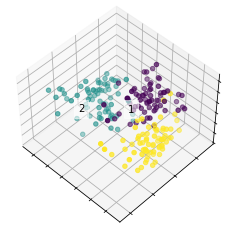

In [12]:
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

labels=[0,1,2]
for label in labels: #Assign actual names to the numeric labels
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), label,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    
# y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()